In [18]:
# Impor pustaka untuk analisis data dan pemrosesan
import pandas as pd
import numpy as np

# Impor pustaka untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# Impor pustaka TensorFlow untuk machine learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Impor modul untuk pemrosesan teks
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Impor callback EarlyStopping dari Keras
from keras.callbacks import EarlyStopping

In [19]:
# Membaca file CSV 'tourism_with_id.csv' dan menyimpannya dalam DataFrame lokasi_wisata
lokasi_wisata = pd.read_csv("tourism_with_id.csv")

# Membaca file CSV 'tourism_rating.csv' dan menyimpannya dalam DataFrame rating_pengunjung
rating_pengunjung = pd.read_csv("tourism_rating.csv")

# Membaca file CSV 'user.csv' dan menyimpannya dalam DataFrame users
users = pd.read_csv("user.csv")

In [20]:
# Melihat informasi ringkas tentang struktur data di DataFrame 'lokasi_wisata'
lokasi_wisata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [21]:
# Menampilkan lima baris pertama dari DataFrame 'lokasi_wisata'
lokasi_wisata.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [22]:
# Mengecek dan mengidentifikasi kolom tanpa nama
unnamed_columns = [col for col in lokasi_wisata.columns if 'Unnamed:' in col]
unnamed_columns

['Unnamed: 11', 'Unnamed: 12']

In [23]:
#Menghapus kolom tanpa nama dari DataFrame
lokasi_wisata.drop(columns=unnamed_columns, inplace=True)
lokasi_wisata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 37.7+ KB


In [24]:
# Melihat ringkasan statistik dari DataFrame 'lokasi_wisata'
lokasi_wisata.describe().T

,count,mean,std,min,25%,50%,75%,max
Place_Id,437.0,219.000000,126.295289,1.000000,110.000000,219.000000,328.000000,437.000000
Price,437.0,24652.173913,66446.374709,0.000000,0.000000,5000.000000,20000.000000,900000.000000
Rating,437.0,4.442792,0.208587,3.400000,4.300000,4.500000,4.600000,5.000000
Time_Minutes,205.0,82.609756,52.872339,10.000000,45.000000,60.000000,120.000000,360.000000
Lat,437.0,-7.095438,0.727241,-8.197894,-7.749590,-7.020524,-6.829411,1.078880
Long,437.0,109.160142,1.962848,103.931398,107.578369,110.237468,110.431869,112.821662


In [25]:
# Melihat informasi ringkas tentang struktur data di DataFrame 'rating_pengunjung'
rating_pengunjung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [26]:
# Menampilkan lima baris pertama dari DataFrame 'rating_pengunjung'
rating_pengunjung.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [27]:
# Melihat ringkasan statistik dari DataFrame 'rating_pengunjung'
rating_pengunjung.describe().T

,count,mean,std,min,25%,50%,75%,max
User_Id,10000.0,151.2927,86.137374,1.0,77.00,151.0,226.0,300.0
Place_Id,10000.0,219.4164,126.228335,1.0,108.75,220.0,329.0,437.0
Place_Ratings,10000.0,3.0665,1.379952,1.0,2.00,3.0,4.0,5.0


In [28]:
# Menghapus beberapa kolom dari DataFrame 'lokasi_wisata' menggunakan metode drop()
# axis=1 menandakan bahwa yang dihapus adalah kolom
lokasi_wisata = lokasi_wisata.drop(['Description', 'City', 'Price', 'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long'], axis=1)
# Melihat informasi ringkas tentang struktur data di DataFrame 'lokasi_wisata'
lokasi_wisata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Place_Id    437 non-null    int64 
 1   Place_Name  437 non-null    object
 2   Category    437 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.4+ KB


In [29]:
# Memeriksa jumlah nilai yang hilang dalam DataFrame 'lokasi_wisata'
lokasi_wisata.isnull().sum()

Place_Id      0
Place_Name    0
Category      0
dtype: int64

In [30]:
# Memeriksa jumlah nilai yang hilang dalam DataFrame 'rating_pengunjung'
rating_pengunjung.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [31]:
# Menghitung jumlah data duplikat dalam DataFrame 'lokasi_wisata'
jumlah_duplikat_lokasi = lokasi_wisata.duplicated().sum()
print(f'Jumlah data lokasi_wisata yang duplikat: {jumlah_duplikat_lokasi}')

Jumlah data lokasi_wisata yang duplikat: 0


In [32]:
# Menghitung jumlah data duplikat dalam DataFrame 'rating_pengunjung'
jumlah_duplikat_rating = rating_pengunjung.duplicated().sum()
print(f'Jumlah data rating_pengunjung yang duplikat: {jumlah_duplikat_rating}')

Jumlah data rating_pengunjung yang duplikat: 79


In [33]:
# Menghapus data duplikat dari DataFrame 'rating_pengunjung'
# inplace=True akan mengubah DataFrame 'rating_pengunjung' secara langsung, tanpa membuat salinan baru
rating_pengunjung.drop_duplicates(inplace=True)
print(f'Jumlah data rating_pengunjung yang duplikat: {rating_pengunjung.duplicated().sum()}')

Jumlah data rating_pengunjung yang duplikat: 0


In [34]:
# Membuat objek TfidfVectorizer
tf_idf = TfidfVectorizer()
# Melatih kamus dari kategori tempat wisata yang ada dalam DataFrame lokasi_wisata
tf_idf.fit(lokasi_wisata['Category'])
# Mengambil daftar nama fitur (kata-kata unik) dari kamus yang sudah dipelajari
feature_names = tf_idf.get_feature_names_out()
feature_names

array(['alam', 'bahari', 'budaya', 'cagar', 'hiburan', 'ibadah',
       'perbelanjaan', 'pusat', 'taman', 'tempat'], dtype=object)

In [35]:
# Mengubah teks kategori tempat wisata menjadi matriks TF-IDF
tfidf_matrix = tf_idf.fit_transform(lokasi_wisata['Category'])
# Mencetak bentuk (shape) matriks TF-IDF untuk melihat jumlah tempat wisata dan kata-kata unik
print(tfidf_matrix.shape)

(437, 10)


In [36]:
# Mengubah matriks TF-IDF menjadi bentuk dense matrix (array 2D)
dense_tfidf_matrix = tfidf_matrix.todense()

In [37]:
# Membuat DataFrame baru dengan nilai TF-IDF beserta nama tempat wisata sebagai indeks dan kata-kata unik sebagai kolom
tfidf_df = pd.DataFrame(dense_tfidf_matrix, columns=feature_names, index=lokasi_wisata.Place_Name)
# Mengambil 10 baris acak dari matriks TF-IDF untuk dilihat nilainya
sample_tfidf_df = tfidf_df.sample(10, axis=0)
# Cetak DataFrame yang berisi nilai TF-IDF untuk 10 tempat wisata acak
sample_tfidf_df

,alam,bahari,budaya,cagar,hiburan,ibadah,perbelanjaan,pusat,taman,tempat
Place_Name,,,,,,,,,,
Mall Thamrin City,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.707107,0.707107,0.000000,0.0
Bumi Perkemahan Batu Kuda,0.707107,0.0,0.0,0.707107,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Taman Bunga Cihideung,0.707107,0.0,0.0,0.707107,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Panghegar Waterboom Bandung,0.000000,0.0,0.0,0.000000,0.707107,0.0,0.000000,0.000000,0.707107,0.0
Museum Tekstil,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Taman Sungai Mudal,0.707107,0.0,0.0,0.707107,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Selasar Sunaryo Art Space,0.000000,0.0,0.0,0.000000,0.707107,0.0,0.000000,0.000000,0.707107,0.0
Waterpark Kenjeran Surabaya,0.000000,0.0,0.0,0.000000,0.707107,0.0,0.000000,0.000000,0.707107,0.0
Puncak Kebun Buah Mangunan,0.000000,0.0,0.0,0.000000,0.707107,0.0,0.000000,0.000000,0.707107,0.0


In [38]:
# Menghitung similarity score antara setiap pasangan tempat wisata menggunakan cosine similarity
cosine_simi = cosine_similarity(tfidf_matrix)

In [40]:
# Membuat DataFrame baru dengan similarity score sebagai nilai, dan nama tempat wisata sebagai indeks dan kolom
cosine_sim_df = pd.DataFrame(cosine_simi, index=lokasi_wisata.Place_Name, columns=lokasi_wisata.Place_Name)
# Mencetak bentuk (shape) dari DataFrame cosine_sim_df untuk melihat jumlah tempat wisata dan similarity score
print('Shape:', cosine_sim_df.shape)
# Mengambil 10 baris acak dari DataFrame cosine_sim_df untuk melihat similarity score antara tempat-tempat wisata
sample_cosine_sim_df = cosine_sim_df.sample(10, axis=0)
sample_cosine_sim_df

Shape: (437, 437)


Place_Name,Monumen Nasional,Kota Tua,Dunia Fantasi,Taman Mini Indonesia Indah (TMII),Atlantis Water Adventure,Taman Impian Jaya Ancol,Kebun Binatang Ragunan,Ocean Ecopark,Pelabuhan Marina,Pulau Tidung,...,Monumen Bambu Runcing Surabaya,House of Sampoerna,Atlantis Land Surabaya,Taman Hiburan Rakyat,Taman Mundu,Museum Mpu Tantular,Taman Bungkul,Taman Air Mancur Menari Kenjeran,Taman Flora Bratang Surabaya,Gereja Perawan Maria Tak Berdosa Surabaya
Place_Name,,,,,,,,,,,,,,,,,,,,,
Observatorium Bosscha,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Taman Kupu-Kupu Cihanjuang,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alun-alun Utara Keraton Yogyakarta,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Lereng Anteng Panoramic Coffee Place,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Waterboom PIK (Pantai Indah Kapuk),0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
Batununggal Indah Club,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
Monumen Serangan Umum 1 Maret,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
Curug Cilengkrang,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Museum Barli,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [41]:
# Fungsi untuk merekomendasikan tempat wisata serupa berdasarkan kategori tempat input
def rekomendasi_destinasi_wisata(input_tempat_wisata, similarity_data=cosine_sim_df, items=lokasi_wisata[['Place_Name', 'Category']], k=5):
    # Mengambil similarity score antara tempat input dengan semua tempat wisata lainnya
    # dan menyimpannya dalam array index, yang berisi indeks dari tempat-tempat wisata
    # yang memiliki similarity score tertinggi hingga similarity score terkecil
    index = similarity_data.loc[:, input_tempat_wisata].to_numpy().argpartition(range(-1, -k, -1))

    # Mengambil nama tempat wisata yang memiliki similarity score tertinggi hingga similarity score terkecil
    # dengan tempat input, dan menyimpannya dalam Series closest
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Menghapus nama tempat input dari Series closest agar tidak merekomendasikan tempat itu sendiri
    closest = closest.drop(input_tempat_wisata, errors='ignore')

    # Membuat DataFrame baru dari Series closest
    # dan melakukan join dengan DataFrame items berdasarkan kolom 'Place_Name'
    # DataFrame ini akan berisi rekomendasi tempat-tempat wisata serupa berdasarkan kategori tempat input
    result_df = pd.DataFrame(closest).merge(items).head(k)

    # Mengembalikan DataFrame result_df sebagai hasil rekomendasi tempat wisata serupa
    return result_df

In [42]:
# Fungsi untuk mencari tempat wisata berdasarkan nama tempat yang diinputkan
def cari_tempat_wisata(input_tempat_wisata, data_frame=lokasi_wisata):
    # Membuat boolean mask yang berisi nilai True untuk baris-baris yang memiliki nama tempat wisata sesuai dengan input
    boolean_mask = data_frame.Place_Name.eq(input_tempat_wisata)

    # Menggunakan boolean mask untuk melakukan indexing pada DataFrame data_frame
    # Menghasilkan subset dari DataFrame yang hanya berisi baris-baris dengan nama tempat wisata yang sesuai dengan input
    result_df = data_frame[boolean_mask]

    # Mengembalikan DataFrame result_df yang berisi informasi tentang tempat wisata sesuai dengan input
    return result_df

In [45]:
input_tempat_wisata = 'Monumen Nasional'
# Memanggil fungsi cari_tempat_wisata untuk mencari tempat wisata berdasarkan nama tempat yang diinputkan
lokasi_wisata_input = cari_tempat_wisata(input_tempat_wisata)
# Cetak informasi tentang tempat wisata yang dicari dan rekomendasi destinasi wisata serupa
print("Informasi tentang tempat wisata yang dicari:")
lokasi_wisata_input

Informasi tentang tempat wisata yang dicari:


,Place_Id,Place_Name,Category
0,1,Monumen Nasional,Budaya


In [46]:
print("\nRekomendasi destinasi wisata serupa:")
# Memanggil fungsi rekomendasi_destinasi_wisata untuk melakukan rekomendasi destinasi wisata serupa
rekomendasi = rekomendasi_destinasi_wisata(input_tempat_wisata)
rekomendasi


Rekomendasi destinasi wisata serupa:


,Place_Name,Category
0,Candi Sewu,Budaya
1,Museum Benteng Vredeburg Yogyakarta,Budaya
2,Museum Satria Mandala,Budaya
3,Kyotoku Floating Market,Budaya
4,Bandros City Tour,Budaya


In [47]:
# Mendapatkan daftar pengunjung unik dari kolom 'User_Id' dalam DataFrame 'rating_pengunjung'
idx_pengunjung = rating_pengunjung['User_Id'].unique().tolist()
# Membuat kamus 'pengunjung_encode_v1' untuk mengkodekan user ID menjadi nilai terurut
pengunjung_encode_v1 = {x: i for i, x in enumerate(idx_pengunjung)}
# Membuat kamus 'pengunjung_encode_v2' untuk mengembalikan nilai terurut menjadi user ID aslinya
pengunjung_encode_v2 = {i: x for i, x in enumerate(idx_pengunjung)}

In [48]:
# Mendapatkan daftar lokasi unik dari kolom 'Place_Id' dalam DataFrame 'rating_pengunjung'
idx_lokasi = rating_pengunjung['Place_Id'].unique().tolist()
# Membuat kamus 'lokasi_encode_v1' untuk mengkodekan Place_ID menjadi nilai terurut
lokasi_encode_v1 = {x: i for i, x in enumerate(idx_lokasi)}
# Membuat kamus 'lokasi_encode_v2' untuk mengembalikan nilai terurut menjadi Place_ID aslinya
lokasi_encode_v2 = {i: x for i, x in enumerate(idx_lokasi)}

In [50]:
# Melakukan pemetaan (encoding) nilai dari kolom 'User_Id' ke nilai terurut menggunakan kamus 'pengunjung_encode_v1'
rating_pengunjung['pengujung'] = rating_pengunjung['User_Id'].map(pengunjung_encode_v1)
# Melakukan pemetaan (encoding) nilai dari kolom 'Place_Id' ke nilai terurut menggunakan kamus 'lokasi_encode_v1'
rating_pengunjung['tempat_wisata'] = rating_pengunjung['Place_Id'].map(lokasi_encode_v1)

In [51]:
# Menghitung total jumlah pengunjung dengan mengambil panjang kamus 'pengunjung_encode_v1'
total_pengunjung = len(pengunjung_encode_v1)
# Menghitung total jumlah tempat wisata dengan mengambil panjang kamus 'lokasi_encode_v2'
total_wisata = len(lokasi_encode_v2)
# Mengkonversi nilai dalam kolom 'Place_Ratings' menjadi tipe data float32 dan menyimpannya di kolom baru 'rating'
rating_pengunjung['rating'] = rating_pengunjung['Place_Ratings'].values.astype(np.float32)
# Menghitung nilai rating terkecil dengan menggunakan fungsi min() pada kolom 'rating'
rating_terkecil = min(rating_pengunjung['rating'])
# Menghitung nilai rating terbesar dengan menggunakan fungsi max() pada kolom 'rating'
rating_terbesar = max(rating_pengunjung['rating'])
print(f'Total Pengunjung: {total_pengunjung}')
print(f'Total Lokasi Tempat Wisata: {total_wisata}')
print(f'Rating Terkecil: {rating_terkecil}')
print(f'Rating Tertinggi: {rating_terbesar}')

Total Pengunjung: 300
Total Lokasi Tempat Wisata: 437
Rating Terkecil: 1.0
Rating Tertinggi: 5.0


In [53]:
# Mengacak urutan baris dalam DataFrame 'rating_pengunjung' menggunakan metode 'sample'
# dengan frac=1 untuk mengambil seluruh baris dan random_state=42 sebagai seed untuk pengacakan yang konsisten
rating_pengunjung = rating_pengunjung.sample(frac=1, random_state=42)
rating_pengunjung.head()

,User_Id,Place_Id,Place_Ratings,pengujung,tempat_wisata,rating
9061,273,91,3,272,92,3.0
9515,286,226,5,285,211,5.0
2257,69,255,4,68,146,4.0
533,18,151,5,17,111,5.0
7868,237,64,1,236,132,1.0


In [54]:
# Memisahkan fitur atau atribut 'pengujung' dan 'tempat_wisata' sebagai data input (x)
# Mengambil nilai-nilai dari kolom tersebut dalam bentuk array numpy
x = rating_pengunjung[['pengujung', 'tempat_wisata']].values

# Memisahkan target atau label 'rating' sebagai data output (y)
# Mengaplikasikan fungsi lambda untuk melakukan normalisasi nilai rating ke dalam rentang 0-1
y = rating_pengunjung['rating'].apply(lambda x: (x - rating_terkecil) / (rating_terbesar - rating_terkecil)).values

In [55]:
# Menentukan indeks untuk membagi data menjadi data latih dan data validasi
# Menggunakan 80% data sebagai data latih dan 20% data sebagai data validasi
train_indices = int(0.8 * rating_pengunjung.shape[0])
# Memisahkan data menjadi data latih (train) dan data validasi (validation)
# x_train berisi fitur dari data latih, x_val berisi fitur dari data validasi
# y_train berisi label (rating yang telah dinormalisasi) dari data latih, y_val berisi label dari data validasi
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
print(x, y)

[[272  92]
 [285 211]
 [ 68 146]
 ...
 [ 83 266]
 [ 94 130]
 [154 347]] [0.5  1.   0.75 ... 0.75 0.75 0.25]


In [56]:
class MyRecommendationModel(tf.keras.Model):
  def __init__(self, total_pengunjung, total_wisata, embedding_size, **kwargs):
    super(MyRecommendationModel, self).__init__(**kwargs)
    # Jumlah pengguna, jumlah tempat, dan ukuran embedding
    self.total_pengunjung = total_pengunjung
    self.total_wisata = total_wisata
    self.embedding_size = embedding_size

    # Layer embedding untuk pengguna
    self.user_embedding = layers.Embedding(
        total_pengunjung,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=tf.keras.regularizers.l2(1e-8)
    )
    # Layer embedding untuk bias pengguna
    self.user_bias = layers.Embedding(total_pengunjung, 1)

    # Layer embedding untuk tempat
    self.place_embedding = layers.Embedding(
        total_wisata,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=tf.keras.regularizers.l2(1e-8)
    )
    # Layer embedding untuk bias tempat
    self.place_bias = layers.Embedding(total_wisata, 1)

  def call(self, inputs):
    # Mengambil embedding pengguna berdasarkan ID pengguna di inputs[:,0]
    user_vector = self.user_embedding(inputs[:, 0])
    # Mengambil bias pengguna berdasarkan ID pengguna di inputs[:,0]
    user_bias = self.user_bias(inputs[:, 0])

    # Mengambil embedding tempat berdasarkan ID tempat di inputs[:,1]
    place_vector = self.place_embedding(inputs[:, 1])
    # Mengambil bias tempat berdasarkan ID tempat di inputs[:,1]
    place_bias = self.place_bias(inputs[:, 1])

    # Menghitung hasil perkalian dot antara embedding pengguna dan tempat
    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    # Menggabungkan hasil perkalian dot dengan bias pengguna dan bias tempat
    x = dot_user_place + user_bias + place_bias

    # Menerapkan fungsi aktivasi sigmoid untuk menghasilkan output
    return tf.nn.sigmoid(x)


In [57]:
# Inisialisasi model MyRecommendationModel dengan 50 ukuran embedding
model_rekomendasi = MyRecommendationModel(total_pengunjung, total_wisata, 50)

In [58]:
# Kompile model dengan konfigurasi loss, optimizer, dan metrik evaluasi
model_rekomendasi.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [59]:
# Penghentian dini (early stopping) dengan kriteria min_delta dan kesabaran (patience)
callbacks_early = EarlyStopping(
    min_delta=0.0001,
    patience=5,
    restore_best_weights=True,
)

In [60]:
# Pelatihan model dengan data pelatihan (x_train, y_train) dan validasi menggunakan data validasi (x_val, y_val)
runing_model = model_rekomendasi.fit(
    x=x_train,                    # Data pelatihan (fitur)
    y=y_train,                    # Label pelatihan (target)
    batch_size=8,                 # Ukuran batch yang digunakan selama pelatihan
    epochs=100,                   # Jumlah epoch (siklus pelatihan)
    validation_data=(x_val, y_val),  # Data validasi
    callbacks=[callbacks_early]         # Penggunaan EarlyStopping callback
)

Epoch 1/100
992/992 [==============================] - 8s 5ms/step - loss: 0.6950 - root_mean_squared_error: 0.3478 - val_loss: 0.6943 - val_root_mean_squared_error: 0.3421
Epoch 2/100
992/992 [==============================] - 3s 3ms/step - loss: 0.6937 - root_mean_squared_error: 0.3468 - val_loss: 0.6942 - val_root_mean_squared_error: 0.3420
Epoch 3/100
992/992 [==============================] - 3s 3ms/step - loss: 0.6924 - root_mean_squared_error: 0.3459 - val_loss: 0.6940 - val_root_mean_squared_error: 0.3419
Epoch 4/100
992/992 [==============================] - 3s 3ms/step - loss: 0.6920 - root_mean_squared_error: 0.3456 - val_loss: 0.6940 - val_root_mean_squared_error: 0.3419
Epoch 5/100
992/992 [==============================] - 4s 4ms/step - loss: 0.6909 - root_mean_squared_error: 0.3448 - val_loss: 0.6939 - val_root_mean_squared_error: 0.3418
Epoch 6/100
992/992 [==============================] - 4s 4ms/step - loss: 0.6892 - root_mean_squared_error: 0.3436 - val_loss: 0.6937 

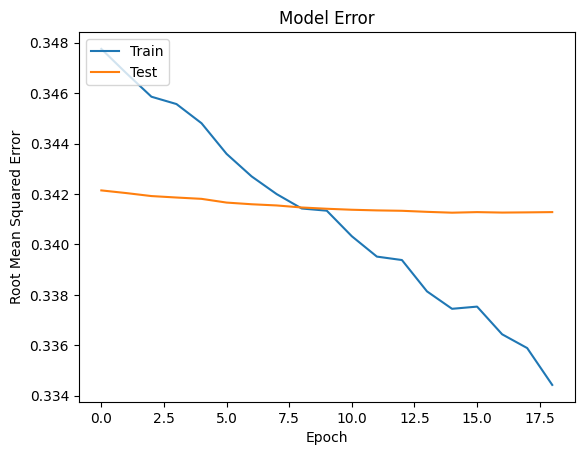

In [61]:
# runing_model adalah objek yang menyimpan catatan hasil pelatihan model

# Plot nilai RMSE pada proses pelatihan (train)
plt.plot(runing_model.history['root_mean_squared_error'])
# Plot nilai RMSE pada proses validasi (test)
plt.plot(runing_model.history['val_root_mean_squared_error'])
# Memberikan judul pada plot
plt.title('Model Error')
# Memberikan label pada sumbu y (y-axis)
plt.ylabel('Root Mean Squared Error')
# Memberikan label pada sumbu x (x-axis)
plt.xlabel('Epoch')
# Menambahkan legenda pada plot untuk menandai garis yang sesuai dengan data latih dan data validasi
plt.legend(['Train', 'Test'], loc='upper left')
# Menampilkan plot
plt.show()

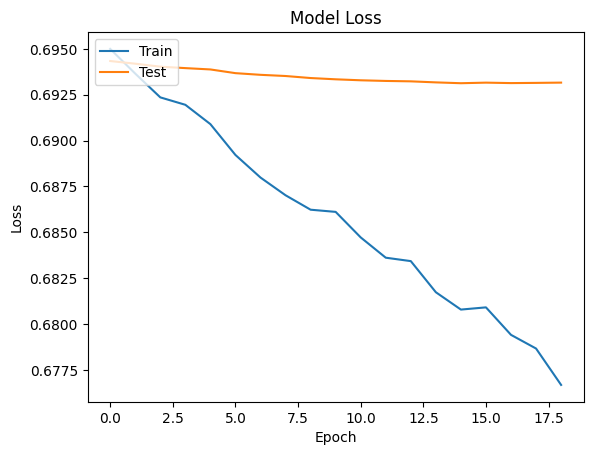

In [62]:
# Plot nilai loss pada proses pelatihan (train)
plt.plot(runing_model.history['loss'])
# Plot nilai loss pada proses validasi (test)
plt.plot(runing_model.history['val_loss'])
# Memberikan judul pada plot
plt.title('Model Loss')
# Memberikan label pada sumbu y (y-axis)
plt.ylabel('Loss')
# Memberikan label pada sumbu x (x-axis)
plt.xlabel('Epoch')
# Menambahkan legenda pada plot untuk menandai garis yang sesuai dengan data latih dan data validasi
plt.legend(['Train', 'Test'], loc='upper left')
# Menampilkan plot
plt.show()

In [63]:
# Mengambil data dari DataFrame 'lokasi_wisata' dan 'rating_pengunjung'
lokasi_wisata_new = lokasi_wisata
rating_lokasi_new = rating_pengunjung
# Mengambil ID pengguna secara acak sebagai contoh untuk proses rekomendasi
id_sample_pengunjung = rating_lokasi_new.User_Id.sample(1).iloc[0]
# Memfilter tempat-tempat yang sudah dinilai oleh pengguna tersebut
lokasi_sudah_dinilai = rating_lokasi_new[rating_lokasi_new.User_Id == id_sample_pengunjung]
# Memilih tempat-tempat yang belum dinilai oleh pengguna
lokasi_belum_dinilai = lokasi_wisata_new[~lokasi_wisata_new['Place_Id'].isin(lokasi_sudah_dinilai.Place_Id.values)]['Place_Id']
# Filtering agar hanya mempertahankan tempat-tempat yang ada dalam kamus encoding 'lokasi_encode_v1'
lokasi_belum_dinilai = list(set(lokasi_belum_dinilai).intersection(set(lokasi_encode_v1.keys())))
# Mengonversi tempat-tempat yang belum dinilai menjadi nilai encoding yang sesuai dengan model
lokasi_belum_dinilai = [[lokasi_encode_v1.get(x)] for x in lokasi_belum_dinilai]
# Mengambil nilai encoding yang sesuai untuk ID pengguna
pangunjung_encoder = pengunjung_encode_v1.get(id_sample_pengunjung)
# Membentuk data input untuk model dengan menggabungkan nilai encoding pengguna dan tempat-tempat yang belum dinilai
array_lokasi_pengunjung = np.hstack(
    ([[pangunjung_encoder]] * len(lokasi_belum_dinilai), lokasi_belum_dinilai)
)

In [65]:
# Melakukan prediksi menggunakan model untuk mendapatkan nilai rekomendasi tempat
ratings_prediksi = model_rekomendasi.predict(array_lokasi_pengunjung).flatten()

# Mengambil indeks dari 10 rekomendasi teratas berdasarkan nilai prediksi
top_ratings_indices = ratings_prediksi.argsort()[-10:][::-1]

# Mengonversi indeks rekomendasi ke ID tempat yang direkomendasikan
recommended_idx_lokasi = [
    lokasi_encode_v2.get(lokasi_belum_dinilai[x][0]) for x in top_ratings_indices
]

13/13 [==============================] - 1s 4ms/step


In [66]:
# Menampilkan judul dan ID pengguna yang rekomendasinya ditampilkan
print('Menampilkan Rekomendasi Destinasi Wisata untuk pengunjung: {}'.format(id_sample_pengunjung))
print('=====' * 8)

# Menampilkan tempat-tempat yang memiliki peringkat tinggi dari pengguna
print('Destinasi Wisata Dengan Rating Tertinggi')
print('-----' * 8)

# Mengambil ID tempat dari 5 tempat yang memiliki peringkat tertinggi dari pengguna
top_rekomendasi_wisata = (
    lokasi_sudah_dinilai.sort_values(
        by='rating',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)


# Mendapatkan informasi tempat berdasarkan ID tempat dari tempat-tempat dengan peringkat tertinggi
lokasi_wisata_new_rows = lokasi_wisata_new[lokasi_wisata_new['Place_Id'].isin(top_rekomendasi_wisata)]

# Menampilkan informasi tempat-tempat yang memiliki peringkat tinggi dari pengguna
for row in lokasi_wisata_new_rows.itertuples():
    print(row.Place_Name + ':', row.Category)

Menampilkan Rekomendasi Destinasi Wisata untuk pengunjung: 52
Destinasi Wisata Dengan Rating Tertinggi
----------------------------------------
Grand Indonesia Mall: Pusat Perbelanjaan
Rumah Sipitung: Budaya
Bukit Bintang Yogyakarta: Taman Hiburan
Galaxy Waterpark Jogja: Taman Hiburan
Ciwangun Indah Camp Official: Cagar Alam


In [67]:
# Menampilkan batas antara dua bagian hasil rekomendasi
print('-----' * 8)

# Menampilkan tempat-tempat rekomendasi teratas (top 10) dari model
print('Top 10 Rekomendasi Destinasi Wisata')
print('-----' * 8)

# Mendapatkan informasi tempat berdasarkan ID tempat dari tempat-tempat yang direkomendasikan
loc_destinasi = lokasi_wisata_new[lokasi_wisata_new['Place_Id'].isin(recommended_idx_lokasi)]

# Menampilkan informasi tempat-tempat yang direkomendasikan oleh model
for row in loc_destinasi.itertuples():
    print(row.Place_Name + ':', row.Category)

----------------------------------------
Top 10 Rekomendasi Destinasi Wisata
----------------------------------------
Candi Ijo: Budaya
Pantai Indrayanti: Bahari
Pantai Parangtritis: Bahari
Goa Pindul: Cagar Alam
Pantai Depok Jogja: Bahari
Jogja Bay Pirates Adventure Waterpark: Taman Hiburan
Pantai Nguluran: Bahari
Pantai Drini: Bahari
Candi Sewu: Budaya
Pantai Wediombo: Bahari
